# PCA año 1990 

In [4]:
import sys

In [10]:
sys.path

['/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/home/miuser/.ipython',
 '/home/miuser/jupyter/PracticaFinalMNO/',
 '/home/miuser/jupyter/PracticaFinalMNO']

In [9]:
sys.path.append("/home/miuser/jupyter/PracticaFinalMNO")

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler

In [2]:
datos_1990 = pd.read_csv('../data/Marginacion_1990.csv')

In [3]:
datos_1990.head()

,CVE_ENT,NOM_ENT,POB_TOT,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL.5000,PO2SM,IM,GM,LUGAR,A.O
0,1,Aguascalientes,719659,7.06,33.85,10.88,4.97,4.18,51.03,7.45,26.97,62.53,-0.89,Bajo,27,1990
1,2,Baja California,1660855,4.68,24.01,4.89,10.49,19.59,45.43,8.13,11.95,39.96,-1.34,Muy bajo,30,1990
2,3,Baja California Sur,317764,5.39,27.77,7.03,11.10,10.17,48.60,13.99,25.60,54.06,-0.97,Bajo,28,1990
3,4,Campeche,535185,15.40,44.82,24.80,15.02,29.52,65.03,24.16,36.21,68.07,0.48,Alto,10,1990
4,5,Coahuila de Zaragoza,1972340,5.48,28.18,10.81,5.24,7.76,50.00,8.48,17.13,60.89,-1.05,Bajo,29,1990


Escogemos únicamente los indicadores socioeconómicos 

In [4]:
variables = datos_1990[['ANALF', 'SPRIM', 'OVSDE', 'OVSEE', 
                        'OVSAE', 'VHAC', 'OVPT', 'PL.5000','PO2SM']]
variables

,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL.5000,PO2SM
0,7.06,33.85,10.88,4.97,4.18,51.03,7.45,26.97,62.53
1,4.68,24.01,4.89,10.49,19.59,45.43,8.13,11.95,39.96
2,5.39,27.77,7.03,11.10,10.17,48.60,13.99,25.60,54.06
3,15.40,44.82,24.80,15.02,29.52,65.03,24.16,36.21,68.07
4,5.48,28.18,10.81,5.24,7.76,50.00,8.48,17.13,60.89
5,9.30,36.02,8.37,5.82,6.61,56.03,21.13,22.39,50.40
6,30.12,62.08,42.66,34.92,42.09,74.07,50.90,66.56,80.08
7,6.12,30.86,14.10,13.23,11.96,47.76,9.58,25.57,52.81
8,4.00,16.77,1.81,0.76,3.33,45.58,2.45,0.32,60.47
9,6.99,39.49,32.38,13.73,14.98,53.47,20.04,49.29,67.65


In [5]:
X_scaled = StandardScaler().fit_transform(variables)
#X_scaled = variables - variables.mean()

Para realizar análisis de componentes prinicpales necesitamos la matriz de varianzas y covarianzas

In [6]:
var_cov = np.cov(X_scaled.T)
pd.DataFrame(var_cov)

,0,1,2,3,4,5,6,7,8
0,1.032258,0.915184,0.862426,0.794082,0.827128,0.883254,0.942448,0.809521,0.698131
1,0.915184,1.032258,0.868570,0.783812,0.821002,0.836875,0.853388,0.926116,0.697988
2,0.862426,0.868570,1.032258,0.665860,0.701395,0.783716,0.772212,0.893400,0.776453
3,0.794082,0.783812,0.665860,1.032258,0.851486,0.632061,0.822321,0.774688,0.573785
4,0.827128,0.821002,0.701395,0.851486,1.032258,0.739480,0.790470,0.787403,0.661214
5,0.883254,0.836875,0.783716,0.632061,0.739480,1.032258,0.819231,0.801261,0.678046
6,0.942448,0.853388,0.772212,0.822321,0.790470,0.819231,1.032258,0.788556,0.585841
7,0.809521,0.926116,0.893400,0.774688,0.787403,0.801261,0.788556,1.032258,0.683586
8,0.698131,0.697988,0.776453,0.573785,0.661214,0.678046,0.585841,0.683586,1.032258


In [7]:
def sign(x):
    """
    Helper function for computing sign of real number x.
    """
    if x >=0:
        return 1
    else:
        return -1

def off(A):
    """
    Frobenius norm without the main diagonal
    Args:
        Ak (numpy ndarray): Matrix for getting the Frobenius norm.
    Returns:
        s: The Frobenius norm without the sum of the main diagonal indices.
    """
    s = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if j != i:
                s1 = math.sqrt(A[i,j]**2)
                s = s + s1
    return s

def compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2):
    """
    Helper function for computing entries of Jacobi rotation.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        c (float): value of cos of theta for Jacobi rotation matrix.
        s (float): value of sin of theta for Jacobi rotation matrix.
    """
    if np.abs(Ak[idx1,idx2]) > np.finfo(float).eps:
        tau = (Ak[idx2, idx2] - Ak[idx1, idx1])/(2*Ak[idx1, idx2])
        t_star = sign(tau)/(np.abs(tau) + np.sqrt(1+tau**2))
        c = 1/np.sqrt(1+t_star**2)
        s = c*t_star
    else: #no rotation is performed
        c = 1
        s = 0
    return (c,s)


def compute_Jacobi_rotation(Ak, idx1, idx2):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        J (numpy ndarray): Jacobi rotation matrix.
    """
    c,s = compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2)
    m,n = Ak.shape
    J = np.eye(m)
    J[idx1, idx1] = J[idx2, idx2] = c
    J[idx1, idx2] = s
    J[idx2, idx1] = -s
    return J

   
def compute_Jacobi_eigenvectors(A, tol, max_sweeps):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        Q (numpy ndarray): Matrix that contain A's eigenvectors.
    """
    A_k = A.copy()
    m,n = A_k.shape
    Q = np.eye(m)
    sweeps = 0
    while (off(A_k) > tol*np.linalg.norm(A_k) and sweeps < max_sweeps + 1):
        sweeps += 1
        for i in range(A_k.shape[0]):
            j = i + 1
            for m in range(A_k.shape[0]-i-1):
                J = compute_Jacobi_rotation(A_k, i, j)
                A_k = J.T@A_k@J
                Q = Q @ J
                j += 1
                
    return Q 

índices: 

         (1,2),(1,3),(1,4),(1,5),(1,6),(1,7), (1,8),(1,9),

         (2,3),(2,4),(2,5), (2,6), (2,7), (2,8), (2,9)
         
         (3,4), (3,5), (3,6), (3,7), (3,9), (3,9),
         
         (4,5), (4,6), (4,7), (4,8), (4,9),
         
         (5,6), (5,7), (5,8), (5,9),
         
         (6,7), (6,8), (6,9),
         
         (7,8), (7,9),
         
         (8,9)
         

Primer sweep

In [8]:
J_1_2 = compute_Jacobi_rotation(var_cov,0,1)

A_1_2 = J_1_2.T@var_cov@J_1_2

J_1_3 = compute_Jacobi_rotation(A_1_2,0,2)

A_1_3 = J_1_3.T@A_1_2@J_1_3

J_1_4 = compute_Jacobi_rotation(A_1_3,0,3)
A_1_4 = J_1_4.T@A_1_3@J_1_4

J_1_5 = compute_Jacobi_rotation(A_1_4,0,4)
A_1_5 = J_1_5.T@A_1_4@J_1_5

J_1_6 = compute_Jacobi_rotation(A_1_5,0,5)
A_1_6 = J_1_6.T@A_1_5@J_1_6


J_1_7 = compute_Jacobi_rotation(A_1_6,0,6)
A_1_7 = J_1_7.T@A_1_6@J_1_7


J_1_8 = compute_Jacobi_rotation(A_1_7,0,7)
A_1_8 = J_1_8.T@A_1_7@J_1_8


J_1_9 = compute_Jacobi_rotation(A_1_8,0,8)
A_1_9 = J_1_9.T@A_1_8@J_1_9


J_2_3 = compute_Jacobi_rotation(A_1_9,1,2)
A_2_3 = J_2_3.T@A_1_9@J_2_3


J_2_4 = compute_Jacobi_rotation(A_2_3,1,3)
A_2_4 = J_2_4.T@A_2_3@J_2_4

J_2_5 = compute_Jacobi_rotation(A_2_4,1,4)
A_2_5 = J_2_5.T@A_2_4@J_2_5

J_2_6 = compute_Jacobi_rotation(A_2_5,1,5)
A_2_6 = J_2_6.T@A_2_5@J_2_6

J_2_7 = compute_Jacobi_rotation(A_2_6,1,6)
A_2_7 = J_2_7.T@A_2_6@J_2_7

J_2_8 = compute_Jacobi_rotation(A_2_7,1,7)
A_2_8 = J_2_8.T@A_2_7@J_2_8

J_2_9 = compute_Jacobi_rotation(A_2_8,1,8)
A_2_9 = J_2_9.T@A_2_8@J_2_9

J_3_4 = compute_Jacobi_rotation(A_2_9,2,3)
A_3_4 = J_3_4.T@A_2_9@J_3_4

J_3_5 = compute_Jacobi_rotation(A_3_4,2,4)
A_3_5 = J_3_5.T@A_3_4@J_3_5

J_3_6 = compute_Jacobi_rotation(A_3_5,2,5)
A_3_6 = J_3_6.T@A_3_5@J_3_6

J_3_7 = compute_Jacobi_rotation(A_3_6,2,6)
A_3_7 = J_3_7.T@A_3_6@J_3_7

J_3_8 = compute_Jacobi_rotation(A_3_7,2,7)
A_3_8 = J_3_8.T@A_3_7@J_3_8

J_3_9 = compute_Jacobi_rotation(A_3_8,2,8)
A_3_9 = J_3_9.T@A_3_8@J_3_9

J_4_5 = compute_Jacobi_rotation(A_3_9,3,4)
A_4_5 = J_4_5.T@A_3_9@J_4_5

J_4_6 = compute_Jacobi_rotation(A_4_5,3,5)
A_4_6 = J_4_6.T@A_4_5@J_4_6

J_4_7 = compute_Jacobi_rotation(A_4_6,3,6)
A_4_7 = J_4_7.T@A_4_6@J_4_7

J_4_8 = compute_Jacobi_rotation(A_4_7,3,7)
A_4_8 = J_4_8.T@A_4_7@J_4_8

J_4_9 = compute_Jacobi_rotation(A_4_8,3,8)
A_4_9 = J_4_9.T@A_4_8@J_4_9

J_5_6 = compute_Jacobi_rotation(A_4_9,4,5)
A_5_6 = J_5_6.T@A_4_9@J_5_6

J_5_7 = compute_Jacobi_rotation(A_5_6,4,6)
A_5_7 = J_5_7.T@A_5_6@J_5_7

J_5_8 = compute_Jacobi_rotation(A_5_7,4,7)
A_5_8 = J_5_8.T@A_5_7@J_5_8

J_5_9 = compute_Jacobi_rotation(A_5_8,4,8)
A_5_9 = J_5_9.T@A_5_8@J_5_9

J_6_7 = compute_Jacobi_rotation(A_5_9,5,6)
A_6_7 = J_6_7.T@A_5_9@J_6_7

J_6_8 = compute_Jacobi_rotation(A_6_7,5,7)
A_6_8 = J_6_8.T@A_6_7@J_6_8

J_6_9 = compute_Jacobi_rotation(A_6_8,5,8)
A_6_9 = J_6_9.T@A_6_8@J_6_9

J_7_8 = compute_Jacobi_rotation(A_6_9,6,7)
A_7_8 = J_7_8.T@A_6_9@J_7_8

J_7_9 = compute_Jacobi_rotation(A_7_8,6,8)
A_7_9 = J_7_9.T@A_7_8@J_7_9

J_8_9 = compute_Jacobi_rotation(A_7_9,7,8)
A_8_9 = J_8_9.T@A_7_9@J_8_9
pd.DataFrame(A_8_9)

,0,1,2,3,4,5,6,7,8
0,7.298910,-0.026027,-0.082433,-0.013489,-0.049105,-0.001015,-0.007292,5.248528e-03,-1.772505e-02
1,-0.026027,0.064549,-0.023351,-0.001876,0.000200,0.028057,0.008849,2.068386e-02,-2.487410e-02
2,-0.082433,-0.023351,0.109457,-0.001442,-0.001096,0.008305,0.013033,1.246642e-02,-1.056276e-02
3,-0.013489,-0.001876,-0.001442,0.583551,-0.001169,0.036637,0.045103,6.411562e-02,-3.986405e-02
4,-0.049105,0.000200,-0.001096,-0.001169,0.105003,-0.022980,-0.013603,-2.312053e-02,1.834358e-02
5,-0.001015,0.028057,0.008305,0.036637,-0.022980,0.322774,0.003480,-1.739187e-02,2.433634e-03
6,-0.007292,0.008849,0.013033,0.045103,-0.013603,0.003480,0.233793,-1.258028e-02,2.359786e-03
7,0.005249,0.020684,0.012466,0.064116,-0.023121,-0.017392,-0.012580,1.352558e-01,2.653422e-18
8,-0.017725,-0.024874,-0.010563,-0.039864,0.018344,0.002434,0.002360,4.163336e-17,4.370296e-01


# SEGUNDO SWEEP

In [9]:
J_1_2 = compute_Jacobi_rotation(A_8_9,0,1)

A_1_2 = J_1_2.T@A_8_9@J_1_2

J_1_3 = compute_Jacobi_rotation(A_1_2,0,2)

A_1_3 = J_1_3.T@A_1_2@J_1_3

J_1_4 = compute_Jacobi_rotation(A_1_3,0,3)
A_1_4 = J_1_4.T@A_1_3@J_1_4

J_1_5 = compute_Jacobi_rotation(A_1_4,0,4)
A_1_5 = J_1_5.T@A_1_4@J_1_5

J_1_6 = compute_Jacobi_rotation(A_1_5,0,5)
A_1_6 = J_1_6.T@A_1_5@J_1_6


J_1_7 = compute_Jacobi_rotation(A_1_6,0,6)
A_1_7 = J_1_7.T@A_1_6@J_1_7


J_1_8 = compute_Jacobi_rotation(A_1_7,0,7)
A_1_8 = J_1_8.T@A_1_7@J_1_8


J_1_9 = compute_Jacobi_rotation(A_1_8,0,8)
A_1_9 = J_1_9.T@A_1_8@J_1_9


J_2_3 = compute_Jacobi_rotation(A_1_9,1,2)
A_2_3 = J_2_3.T@A_1_9@J_2_3


J_2_4 = compute_Jacobi_rotation(A_2_3,1,3)
A_2_4 = J_2_4.T@A_2_3@J_2_4

J_2_5 = compute_Jacobi_rotation(A_2_4,1,4)
A_2_5 = J_2_5.T@A_2_4@J_2_5

J_2_6 = compute_Jacobi_rotation(A_2_5,1,5)
A_2_6 = J_2_6.T@A_2_5@J_2_6

J_2_7 = compute_Jacobi_rotation(A_2_6,1,6)
A_2_7 = J_2_7.T@A_2_6@J_2_7

J_2_8 = compute_Jacobi_rotation(A_2_7,1,7)
A_2_8 = J_2_8.T@A_2_7@J_2_8

J_2_9 = compute_Jacobi_rotation(A_2_8,1,8)
A_2_9 = J_2_9.T@A_2_8@J_2_9

J_3_4 = compute_Jacobi_rotation(A_2_9,2,3)
A_3_4 = J_3_4.T@A_2_9@J_3_4

J_3_5 = compute_Jacobi_rotation(A_3_4,2,4)
A_3_5 = J_3_5.T@A_3_4@J_3_5

J_3_6 = compute_Jacobi_rotation(A_3_5,2,5)
A_3_6 = J_3_6.T@A_3_5@J_3_6

J_3_7 = compute_Jacobi_rotation(A_3_6,2,6)
A_3_7 = J_3_7.T@A_3_6@J_3_7

J_3_8 = compute_Jacobi_rotation(A_3_7,2,7)
A_3_8 = J_3_8.T@A_3_7@J_3_8

J_3_9 = compute_Jacobi_rotation(A_3_8,2,8)
A_3_9 = J_3_9.T@A_3_8@J_3_9

J_4_5 = compute_Jacobi_rotation(A_3_9,3,4)
A_4_5 = J_4_5.T@A_3_9@J_4_5

J_4_6 = compute_Jacobi_rotation(A_4_5,3,5)
A_4_6 = J_4_6.T@A_4_5@J_4_6

J_4_7 = compute_Jacobi_rotation(A_4_6,3,6)
A_4_7 = J_4_7.T@A_4_6@J_4_7

J_4_8 = compute_Jacobi_rotation(A_4_7,3,7)
A_4_8 = J_4_8.T@A_4_7@J_4_8

J_4_9 = compute_Jacobi_rotation(A_4_8,3,8)
A_4_9 = J_4_9.T@A_4_8@J_4_9

J_5_6 = compute_Jacobi_rotation(A_4_9,4,5)
A_5_6 = J_5_6.T@A_4_9@J_5_6

J_5_7 = compute_Jacobi_rotation(A_5_6,4,6)
A_5_7 = J_5_7.T@A_5_6@J_5_7

J_5_8 = compute_Jacobi_rotation(A_5_7,4,7)
A_5_8 = J_5_8.T@A_5_7@J_5_8

J_5_9 = compute_Jacobi_rotation(A_5_8,4,8)
A_5_9 = J_5_9.T@A_5_8@J_5_9

J_6_7 = compute_Jacobi_rotation(A_5_9,5,6)
A_6_7 = J_6_7.T@A_5_9@J_6_7

J_6_8 = compute_Jacobi_rotation(A_6_7,5,7)
A_6_8 = J_6_8.T@A_6_7@J_6_8

J_6_9 = compute_Jacobi_rotation(A_6_8,5,8)
A_6_9 = J_6_9.T@A_6_8@J_6_9

J_7_8 = compute_Jacobi_rotation(A_6_9,6,7)
A_7_8 = J_7_8.T@A_6_9@J_7_8

J_7_9 = compute_Jacobi_rotation(A_7_8,6,8)
A_7_9 = J_7_9.T@A_7_8@J_7_9

J_8_9 = compute_Jacobi_rotation(A_7_9,7,8)
A_8_9 = J_8_9.T@A_7_9@J_8_9
pd.DataFrame(A_8_9)

,0,1,2,3,4,5,6,7,8
0,7.300365e+00,0.000313,-0.000115,0.000110,-0.000032,-0.000002,-0.000018,7.178042e-05,-4.904210e-07
1,3.126665e-04,0.040859,-0.002340,-0.024966,0.011778,0.006635,0.005367,-2.187770e-03,-4.795014e-03
2,-1.146971e-04,-0.002340,0.116663,-0.015636,0.006918,0.004759,0.003828,-2.646457e-04,-3.031859e-03
3,1.101239e-04,-0.024966,-0.015636,0.608937,-0.009853,-0.002987,-0.002587,4.899852e-03,-6.767307e-04
4,-3.156546e-05,0.011778,0.006918,-0.009853,0.089375,-0.008447,-0.006060,-1.361346e-03,-3.010536e-04
5,-2.344495e-06,0.006635,0.004759,-0.002987,-0.008447,0.324936,0.001143,4.314513e-04,8.696913e-06
6,-1.812265e-05,0.005367,0.003828,-0.002587,-0.006060,0.001143,0.232858,1.832316e-04,-5.932142e-06
7,7.178042e-05,-0.002188,-0.000265,0.004900,-0.001361,0.000431,0.000183,1.451974e-01,1.502419e-19
8,-4.904210e-07,-0.004795,-0.003032,-0.000677,-0.000301,0.000009,-0.000006,5.724587e-17,4.311327e-01


# TERCER SWEEP 

In [10]:

J_1_2 = compute_Jacobi_rotation(A_8_9,0,1)

A_1_2 = J_1_2.T@A_8_9@J_1_2

J_1_3 = compute_Jacobi_rotation(A_1_2,0,2)

A_1_3 = J_1_3.T@A_1_2@J_1_3

J_1_4 = compute_Jacobi_rotation(A_1_3,0,3)
A_1_4 = J_1_4.T@A_1_3@J_1_4

J_1_5 = compute_Jacobi_rotation(A_1_4,0,4)
A_1_5 = J_1_5.T@A_1_4@J_1_5

J_1_6 = compute_Jacobi_rotation(A_1_5,0,5)
A_1_6 = J_1_6.T@A_1_5@J_1_6


J_1_7 = compute_Jacobi_rotation(A_1_6,0,6)
A_1_7 = J_1_7.T@A_1_6@J_1_7


J_1_8 = compute_Jacobi_rotation(A_1_7,0,7)
A_1_8 = J_1_8.T@A_1_7@J_1_8


J_1_9 = compute_Jacobi_rotation(A_1_8,0,8)
A_1_9 = J_1_9.T@A_1_8@J_1_9


J_2_3 = compute_Jacobi_rotation(A_1_9,1,2)
A_2_3 = J_2_3.T@A_1_9@J_2_3


J_2_4 = compute_Jacobi_rotation(A_2_3,1,3)
A_2_4 = J_2_4.T@A_2_3@J_2_4

J_2_5 = compute_Jacobi_rotation(A_2_4,1,4)
A_2_5 = J_2_5.T@A_2_4@J_2_5

J_2_6 = compute_Jacobi_rotation(A_2_5,1,5)
A_2_6 = J_2_6.T@A_2_5@J_2_6

J_2_7 = compute_Jacobi_rotation(A_2_6,1,6)
A_2_7 = J_2_7.T@A_2_6@J_2_7

J_2_8 = compute_Jacobi_rotation(A_2_7,1,7)
A_2_8 = J_2_8.T@A_2_7@J_2_8

J_2_9 = compute_Jacobi_rotation(A_2_8,1,8)
A_2_9 = J_2_9.T@A_2_8@J_2_9

J_3_4 = compute_Jacobi_rotation(A_2_9,2,3)
A_3_4 = J_3_4.T@A_2_9@J_3_4

J_3_5 = compute_Jacobi_rotation(A_3_4,2,4)
A_3_5 = J_3_5.T@A_3_4@J_3_5

J_3_6 = compute_Jacobi_rotation(A_3_5,2,5)
A_3_6 = J_3_6.T@A_3_5@J_3_6

J_3_7 = compute_Jacobi_rotation(A_3_6,2,6)
A_3_7 = J_3_7.T@A_3_6@J_3_7

J_3_8 = compute_Jacobi_rotation(A_3_7,2,7)
A_3_8 = J_3_8.T@A_3_7@J_3_8

J_3_9 = compute_Jacobi_rotation(A_3_8,2,8)
A_3_9 = J_3_9.T@A_3_8@J_3_9

J_4_5 = compute_Jacobi_rotation(A_3_9,3,4)
A_4_5 = J_4_5.T@A_3_9@J_4_5

J_4_6 = compute_Jacobi_rotation(A_4_5,3,5)
A_4_6 = J_4_6.T@A_4_5@J_4_6

J_4_7 = compute_Jacobi_rotation(A_4_6,3,6)
A_4_7 = J_4_7.T@A_4_6@J_4_7

J_4_8 = compute_Jacobi_rotation(A_4_7,3,7)
A_4_8 = J_4_8.T@A_4_7@J_4_8

J_4_9 = compute_Jacobi_rotation(A_4_8,3,8)
A_4_9 = J_4_9.T@A_4_8@J_4_9

J_5_6 = compute_Jacobi_rotation(A_4_9,4,5)
A_5_6 = J_5_6.T@A_4_9@J_5_6

J_5_7 = compute_Jacobi_rotation(A_5_6,4,6)
A_5_7 = J_5_7.T@A_5_6@J_5_7

J_5_8 = compute_Jacobi_rotation(A_5_7,4,7)
A_5_8 = J_5_8.T@A_5_7@J_5_8

J_5_9 = compute_Jacobi_rotation(A_5_8,4,8)
A_5_9 = J_5_9.T@A_5_8@J_5_9

J_6_7 = compute_Jacobi_rotation(A_5_9,5,6)
A_6_7 = J_6_7.T@A_5_9@J_6_7

J_6_8 = compute_Jacobi_rotation(A_6_7,5,7)
A_6_8 = J_6_8.T@A_6_7@J_6_8

J_6_9 = compute_Jacobi_rotation(A_6_8,5,8)
A_6_9 = J_6_9.T@A_6_8@J_6_9

J_7_8 = compute_Jacobi_rotation(A_6_9,6,7)
A_7_8 = J_7_8.T@A_6_9@J_7_8

J_7_9 = compute_Jacobi_rotation(A_7_8,6,8)
A_7_9 = J_7_9.T@A_7_8@J_7_9

J_8_9 = compute_Jacobi_rotation(A_7_9,7,8)
A_8_9 = J_8_9.T@A_7_9@J_8_9
pd.DataFrame(A_8_9).round(4)

,0,1,2,3,4,5,6,7,8
0,7.3004,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000
1,-0.0000,0.0366,-0.0021,0.0025,0.0009,-0.0001,-0.0001,-0.0000,0.0000
2,-0.0000,-0.0021,0.1175,-0.0022,0.0001,-0.0001,-0.0000,0.0000,-0.0000
3,0.0000,0.0025,-0.0022,0.6108,0.0001,-0.0000,-0.0000,-0.0000,-0.0000
4,-0.0000,0.0009,0.0001,0.0001,0.0898,0.0001,0.0000,0.0000,-0.0000
5,-0.0000,-0.0001,-0.0001,-0.0000,0.0001,0.3255,0.0000,0.0000,-0.0000
6,-0.0000,-0.0001,-0.0000,-0.0000,0.0000,0.0000,0.2333,0.0000,0.0000
7,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.1452,0.0000
8,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.4312


# CUARTO SWEEP 


In [11]:

J_1_2 = compute_Jacobi_rotation(A_8_9,0,1)

A_1_2 = J_1_2.T@A_8_9@J_1_2

J_1_3 = compute_Jacobi_rotation(A_1_2,0,2)

A_1_3 = J_1_3.T@A_1_2@J_1_3

J_1_4 = compute_Jacobi_rotation(A_1_3,0,3)
A_1_4 = J_1_4.T@A_1_3@J_1_4

J_1_5 = compute_Jacobi_rotation(A_1_4,0,4)
A_1_5 = J_1_5.T@A_1_4@J_1_5

J_1_6 = compute_Jacobi_rotation(A_1_5,0,5)
A_1_6 = J_1_6.T@A_1_5@J_1_6


J_1_7 = compute_Jacobi_rotation(A_1_6,0,6)
A_1_7 = J_1_7.T@A_1_6@J_1_7


J_1_8 = compute_Jacobi_rotation(A_1_7,0,7)
A_1_8 = J_1_8.T@A_1_7@J_1_8


J_1_9 = compute_Jacobi_rotation(A_1_8,0,8)
A_1_9 = J_1_9.T@A_1_8@J_1_9


J_2_3 = compute_Jacobi_rotation(A_1_9,1,2)
A_2_3 = J_2_3.T@A_1_9@J_2_3


J_2_4 = compute_Jacobi_rotation(A_2_3,1,3)
A_2_4 = J_2_4.T@A_2_3@J_2_4

J_2_5 = compute_Jacobi_rotation(A_2_4,1,4)
A_2_5 = J_2_5.T@A_2_4@J_2_5

J_2_6 = compute_Jacobi_rotation(A_2_5,1,5)
A_2_6 = J_2_6.T@A_2_5@J_2_6

J_2_7 = compute_Jacobi_rotation(A_2_6,1,6)
A_2_7 = J_2_7.T@A_2_6@J_2_7

J_2_8 = compute_Jacobi_rotation(A_2_7,1,7)
A_2_8 = J_2_8.T@A_2_7@J_2_8

J_2_9 = compute_Jacobi_rotation(A_2_8,1,8)
A_2_9 = J_2_9.T@A_2_8@J_2_9

J_3_4 = compute_Jacobi_rotation(A_2_9,2,3)
A_3_4 = J_3_4.T@A_2_9@J_3_4

J_3_5 = compute_Jacobi_rotation(A_3_4,2,4)
A_3_5 = J_3_5.T@A_3_4@J_3_5

J_3_6 = compute_Jacobi_rotation(A_3_5,2,5)
A_3_6 = J_3_6.T@A_3_5@J_3_6

J_3_7 = compute_Jacobi_rotation(A_3_6,2,6)
A_3_7 = J_3_7.T@A_3_6@J_3_7

J_3_8 = compute_Jacobi_rotation(A_3_7,2,7)
A_3_8 = J_3_8.T@A_3_7@J_3_8

J_3_9 = compute_Jacobi_rotation(A_3_8,2,8)
A_3_9 = J_3_9.T@A_3_8@J_3_9

J_4_5 = compute_Jacobi_rotation(A_3_9,3,4)
A_4_5 = J_4_5.T@A_3_9@J_4_5

J_4_6 = compute_Jacobi_rotation(A_4_5,3,5)
A_4_6 = J_4_6.T@A_4_5@J_4_6

J_4_7 = compute_Jacobi_rotation(A_4_6,3,6)
A_4_7 = J_4_7.T@A_4_6@J_4_7

J_4_8 = compute_Jacobi_rotation(A_4_7,3,7)
A_4_8 = J_4_8.T@A_4_7@J_4_8

J_4_9 = compute_Jacobi_rotation(A_4_8,3,8)
A_4_9 = J_4_9.T@A_4_8@J_4_9

J_5_6 = compute_Jacobi_rotation(A_4_9,4,5)
A_5_6 = J_5_6.T@A_4_9@J_5_6

J_5_7 = compute_Jacobi_rotation(A_5_6,4,6)
A_5_7 = J_5_7.T@A_5_6@J_5_7

J_5_8 = compute_Jacobi_rotation(A_5_7,4,7)
A_5_8 = J_5_8.T@A_5_7@J_5_8

J_5_9 = compute_Jacobi_rotation(A_5_8,4,8)
A_5_9 = J_5_9.T@A_5_8@J_5_9

J_6_7 = compute_Jacobi_rotation(A_5_9,5,6)
A_6_7 = J_6_7.T@A_5_9@J_6_7

J_6_8 = compute_Jacobi_rotation(A_6_7,5,7)
A_6_8 = J_6_8.T@A_6_7@J_6_8

J_6_9 = compute_Jacobi_rotation(A_6_8,5,8)
A_6_9 = J_6_9.T@A_6_8@J_6_9

J_7_8 = compute_Jacobi_rotation(A_6_9,6,7)
A_7_8 = J_7_8.T@A_6_9@J_7_8

J_7_9 = compute_Jacobi_rotation(A_7_8,6,8)
A_7_9 = J_7_9.T@A_7_8@J_7_9

J_8_9 = compute_Jacobi_rotation(A_7_9,7,8)
A_8_9 = J_8_9.T@A_7_9@J_8_9
Diagonal990 = pd.DataFrame(A_8_9).round(3)
Diagonal990

,0,1,2,3,4,5,6,7,8
0,7.3,0.000,-0.000,0.000,0.00,-0.000,-0.000,-0.000,0.000
1,0.0,0.036,0.000,-0.000,-0.00,-0.000,-0.000,0.000,-0.000
2,-0.0,0.000,0.118,0.000,0.00,-0.000,-0.000,0.000,0.000
3,0.0,-0.000,0.000,0.611,-0.00,-0.000,-0.000,0.000,-0.000
4,0.0,-0.000,0.000,-0.000,0.09,-0.000,0.000,0.000,0.000
5,-0.0,-0.000,-0.000,-0.000,-0.00,0.325,0.000,-0.000,-0.000
6,-0.0,-0.000,-0.000,-0.000,0.00,0.000,0.233,-0.000,0.000
7,-0.0,0.000,0.000,0.000,0.00,-0.000,-0.000,0.145,-0.000
8,0.0,-0.000,0.000,-0.000,0.00,0.000,-0.000,0.000,0.431


In [12]:
Diagonal990.to_csv('../data/Diagonal_1990.csv', index = False)

# Eigenvalores

(Ordenados de mayor a menor)

In [13]:
a = []
for i in range(0,9):
    a.append(Diagonal990.loc[i,i])
    
eig = sorted(a, reverse=True)
eig

[7.3, 0.611, 0.431, 0.325, 0.233, 0.145, 0.118, 0.09, 0.036]

In [14]:
values, vectors = np.linalg.eig(var_cov)
sorted(values.round(3), reverse=True) 

[7.3, 0.611, 0.431, 0.325, 0.233, 0.145, 0.118, 0.09, 0.036]

Los eigenvalores calculados por nuestra función son similares a los eigenvalores obtenidos por `np.linalg.eig`

# Eigenvectores 

In [15]:
e_vectors = compute_Jacobi_eigenvectors(var_cov,1e-8,6)
pd.DataFrame(e_vectors)

,0,1,2,3,4,5,6,7,8
0,0.133177,-0.332983,0.297800,0.387259,-0.389800,-0.092926,0.162501,0.635350,-0.205125
1,0.094861,0.813059,0.357065,-0.064022,0.009330,-0.099223,-0.261926,0.263725,-0.224174
2,0.079265,-0.278803,0.478845,-0.715058,0.127510,-0.175123,0.003780,0.196980,0.299405
3,-0.210284,-0.166538,-0.067547,0.321251,0.664560,-0.270821,-0.434276,0.314724,0.132853
4,0.265762,-0.209353,0.340903,0.031191,0.437686,0.551079,-0.015544,-0.152426,-0.499621
5,0.129580,0.142658,-0.151324,0.025567,-0.003502,0.691990,-0.058186,0.394214,0.549230
6,-0.075343,0.237932,0.208730,0.227066,0.385724,-0.100543,0.796766,-0.006253,0.220948
7,0.684492,0.034884,-0.527037,-0.202274,0.207874,-0.228648,0.169972,0.240386,-0.171473
8,0.600946,-0.024131,0.299191,0.370569,-0.080585,-0.180501,-0.221415,-0.390467,0.413378


# Construcción de matriz PCA

In [16]:
projected_1 = e_vectors.T[0]@X_scaled.T
projected_2 = e_vectors[1].T@ X_scaled.T
projected_3 = e_vectors[2].T @ X_scaled.T
projected_4 = e_vectors[3].T@ X_scaled.T
projected_5 = e_vectors[5].T@ X_scaled.T
projected_6 = e_vectors[7].T@X_scaled.T
projected_7 = e_vectors[8].T @ X_scaled.T
projected_8 = e_vectors[6].T@X_scaled.T
projected_9 = e_vectors[4].T@X_scaled.T


res = pd.DataFrame(projected_1, columns=['PC1'])

res['PC2'] = projected_2
res['PC3'] = projected_3
res['PC4'] = projected_4
res['PC5'] = projected_5
res['PC6'] = projected_6
res['PC7'] = projected_7
res['PC8'] = projected_8
res['PC9'] = projected_9
res['GM'] = datos_1990['GM']
res['IM'] = datos_1990['IM']

res = res.round(3)
res

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,GM,IM
0,-0.808,-0.508,0.283,-0.355,-0.890,-0.295,-0.372,-1.767,-1.391,Bajo,-0.89
1,-2.976,-1.151,-0.807,0.547,-3.213,0.177,-1.085,-1.847,0.083,Muy bajo,-1.34
2,-1.650,-1.095,-0.438,0.102,-1.742,-0.088,-0.747,-1.336,-0.905,Bajo,-0.97
3,0.682,0.269,-0.133,0.056,1.062,0.022,0.360,0.720,0.625,Alto,0.48
4,-1.343,-1.111,0.292,-0.209,-1.422,-0.478,-0.356,-1.722,-1.110,Bajo,-1.05
5,-1.702,-0.502,-0.456,-1.206,-1.215,0.252,-1.023,-1.153,-0.268,Bajo,-0.76
6,2.948,1.676,-0.976,0.171,3.574,0.840,2.036,4.103,1.528,Muy alto,2.36
7,-1.655,-0.526,-0.464,0.343,-1.890,-0.318,-0.400,-1.347,-0.679,Bajo,-0.87
8,-2.238,-2.323,0.537,-0.287,-2.316,-0.444,-0.268,-2.720,-1.480,Muy bajo,-1.69
9,0.546,0.370,0.562,0.331,-0.045,-0.859,-0.124,0.189,-0.861,Alto,0.01


# Varianza explicada

In [17]:
explained_variances = []
for i in range (len(eig)):
    explained_variances.append(eig[i]/np.sum(eig))
    
explained_variances = [round(num, 3) for num in explained_variances] 
print(explained_variances)

[0.786, 0.066, 0.046, 0.035, 0.025, 0.016, 0.013, 0.01, 0.004]


/home/miuser/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

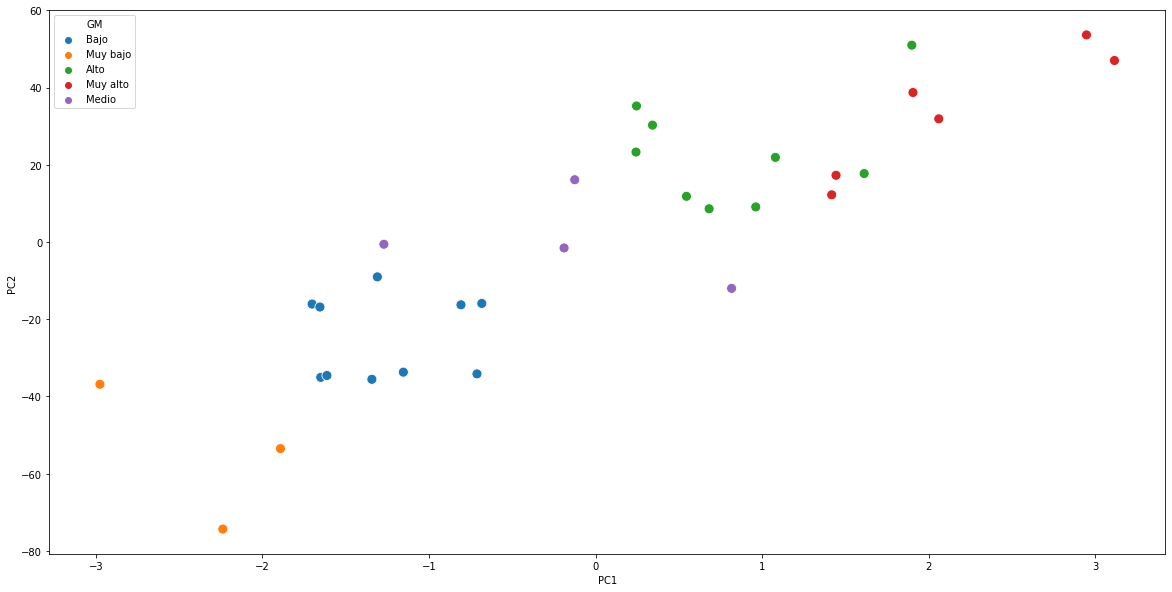

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC2'] * len(res), hue=res['GM'], s=100)

Vemos que con dos componentes principales se explica aproximadamente el 80% de varianza y como se ve en el gráfico, estos nuevos componentes separan claramente a los estados por grado de marginación 

Referencias: 

[PCA from scratch](https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51)

In [19]:
res.to_csv('../data/PCA_1990.csv', index = False)

Nuestro nuevo índice de marginación es el siguiente:

In [20]:
ultimo = res[['PC1', 'IM', 'GM']]

In [21]:
ultimo.sort_values(by='PC1')

,PC1,IM,GM
1,-2.976,-1.34,Muy bajo
8,-2.238,-1.69,Muy bajo
18,-1.892,-1.38,Muy bajo
5,-1.702,-0.76,Bajo
7,-1.655,-0.87,Bajo
2,-1.650,-0.97,Bajo
25,-1.613,-0.86,Bajo
4,-1.343,-1.05,Bajo
13,-1.310,-0.77,Bajo
22,-1.271,-0.19,Medio


In [22]:
res[['PC1', 'IM', 'GM']].to_csv('../data/IM_PCA_1990.csv', index = False)

Esperemos que con este nuevo índice de marginación, que es el primer componente principal clasifique mejor los estados con grado de marginación 